Guardado: plot_L_SE_BA Z=4.png
Guardado: plot_L_SE_BA Z=16.png
Guardado: plot_L_SE_ER Z=4.png
Guardado: plot_L_SE_ER Z=16.png
Guardado: plot_Theta_SE_L4.png
Guardado: plot_Corr_SE_BA Z=4.png
Guardado: plot_Corr_SE_BA Z=16.png
Guardado: plot_Corr_SE_ER Z=4.png
Guardado: plot_Corr_SE_ER Z=16.png


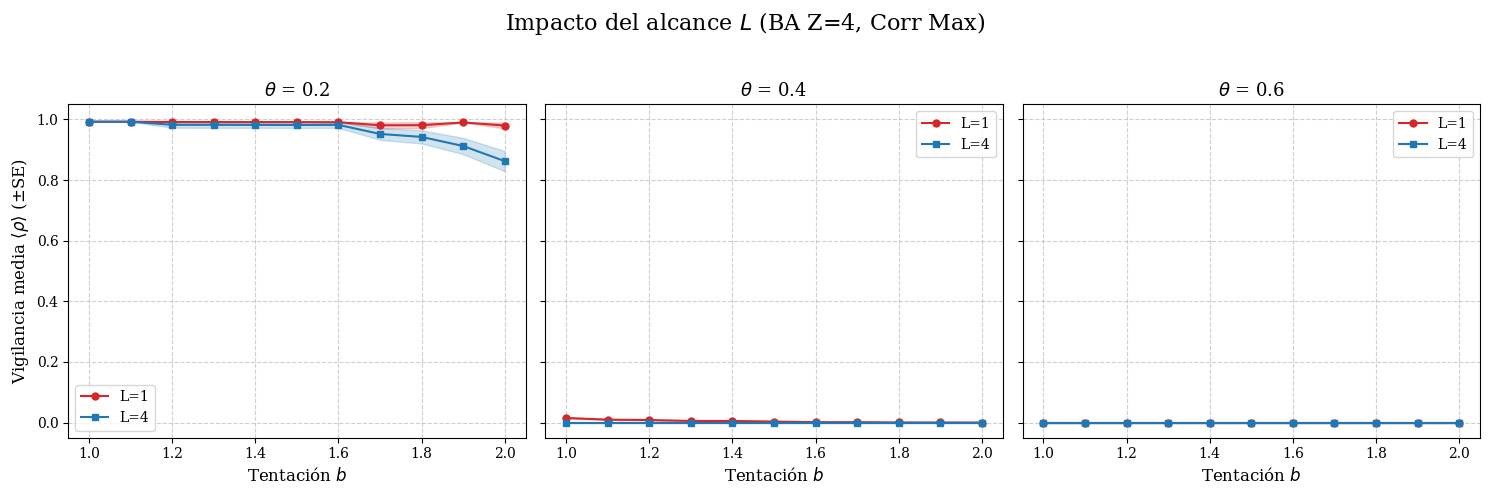

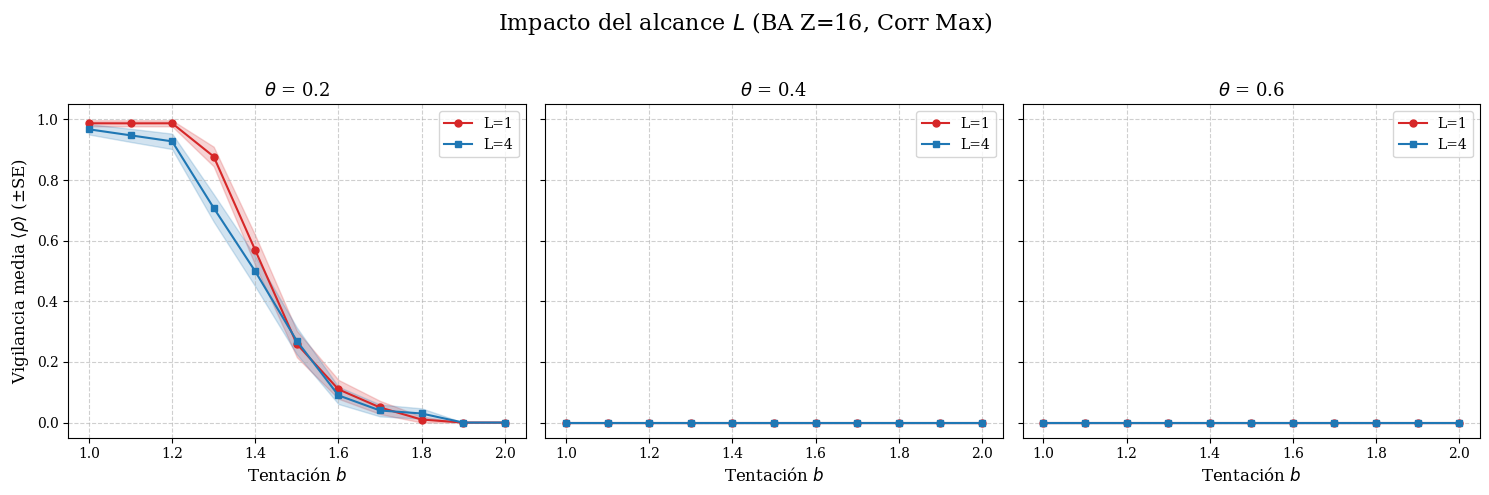

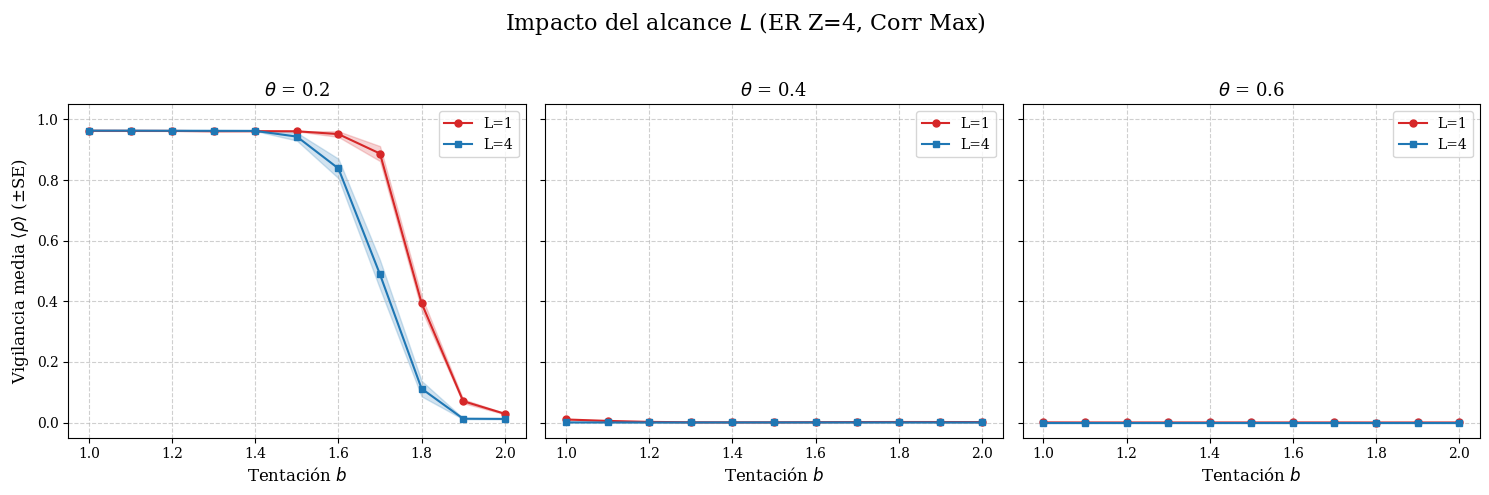

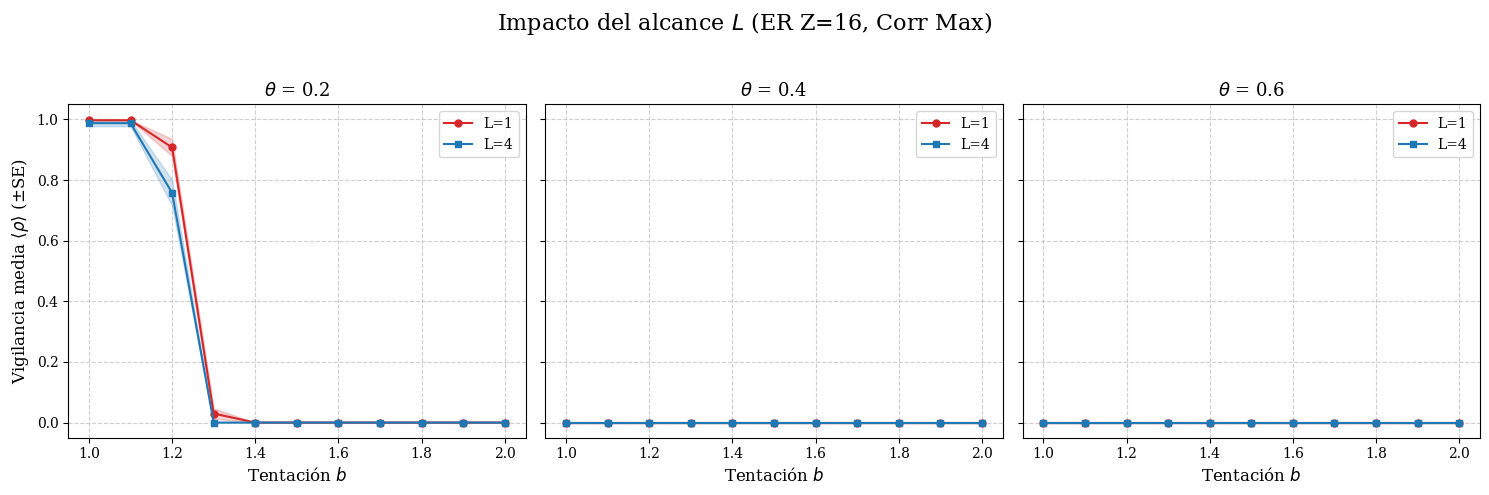

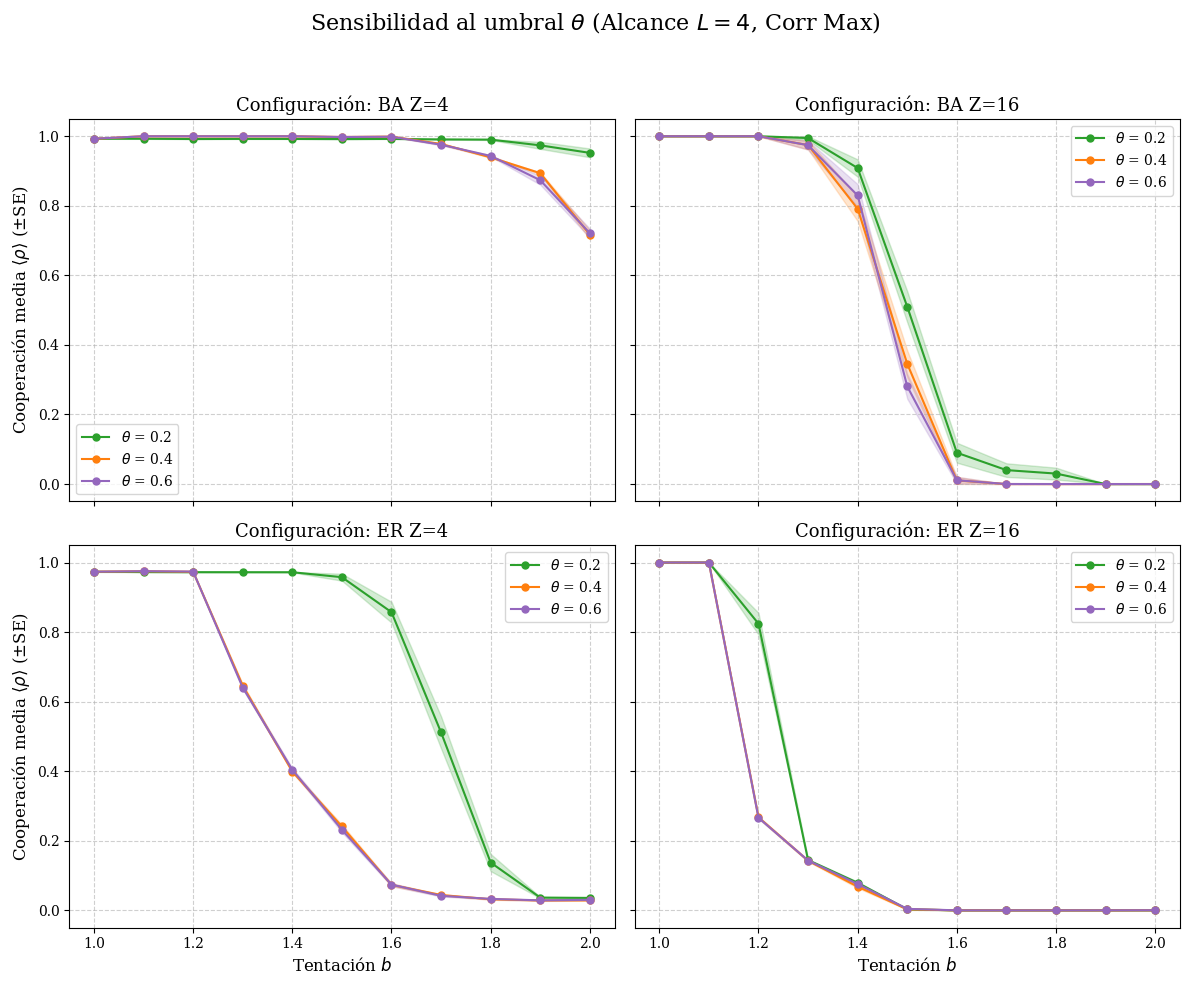

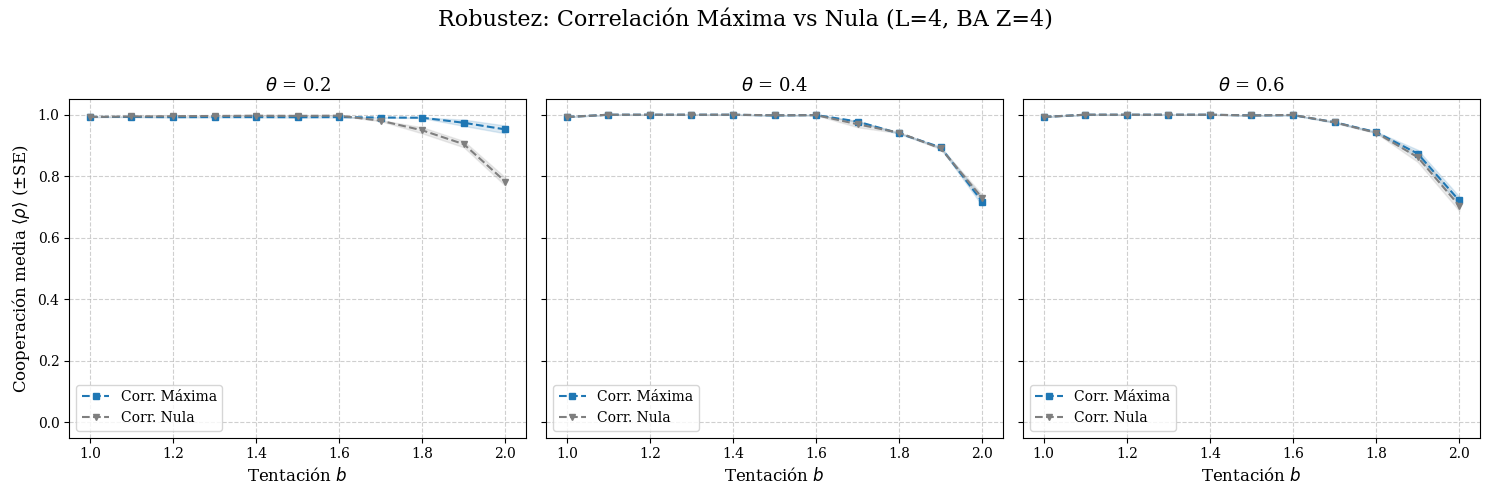

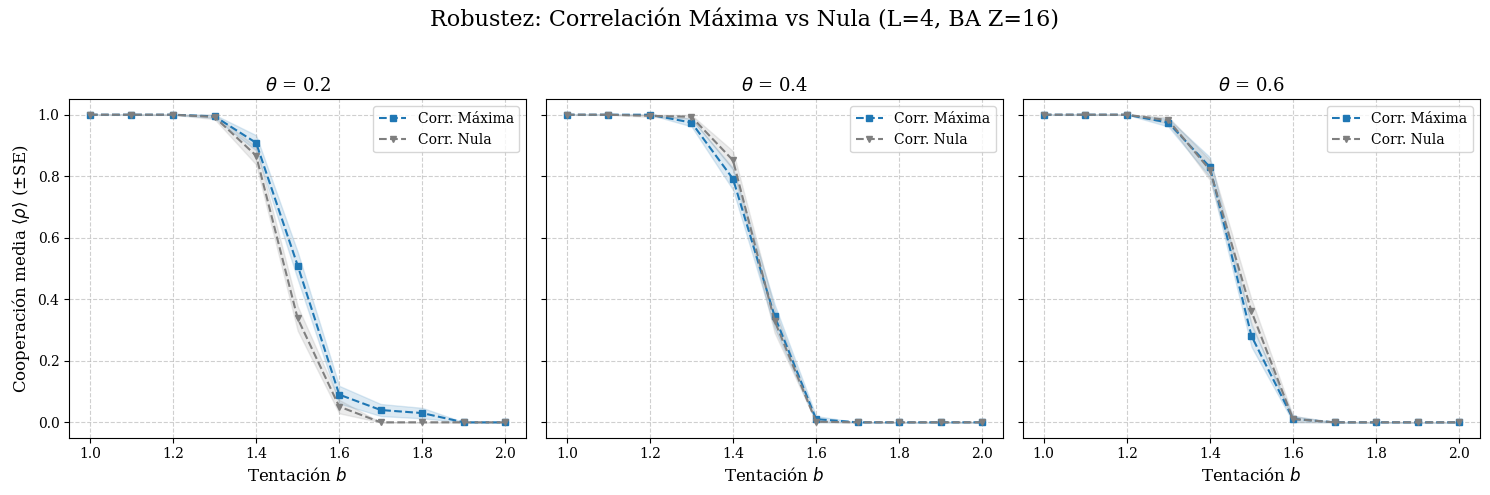

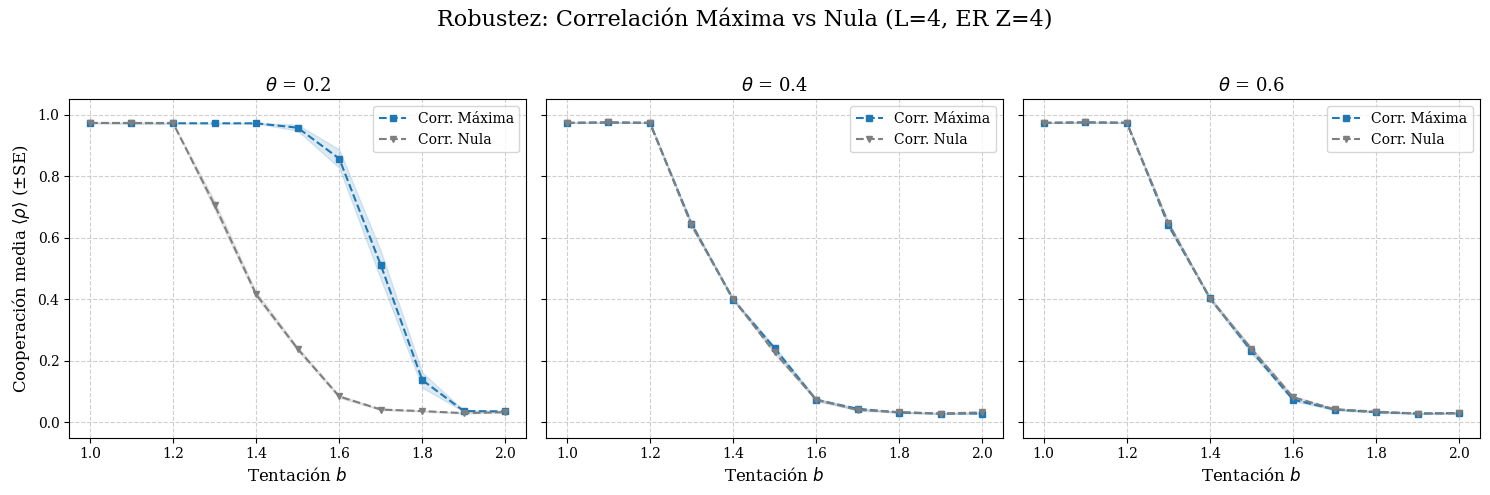

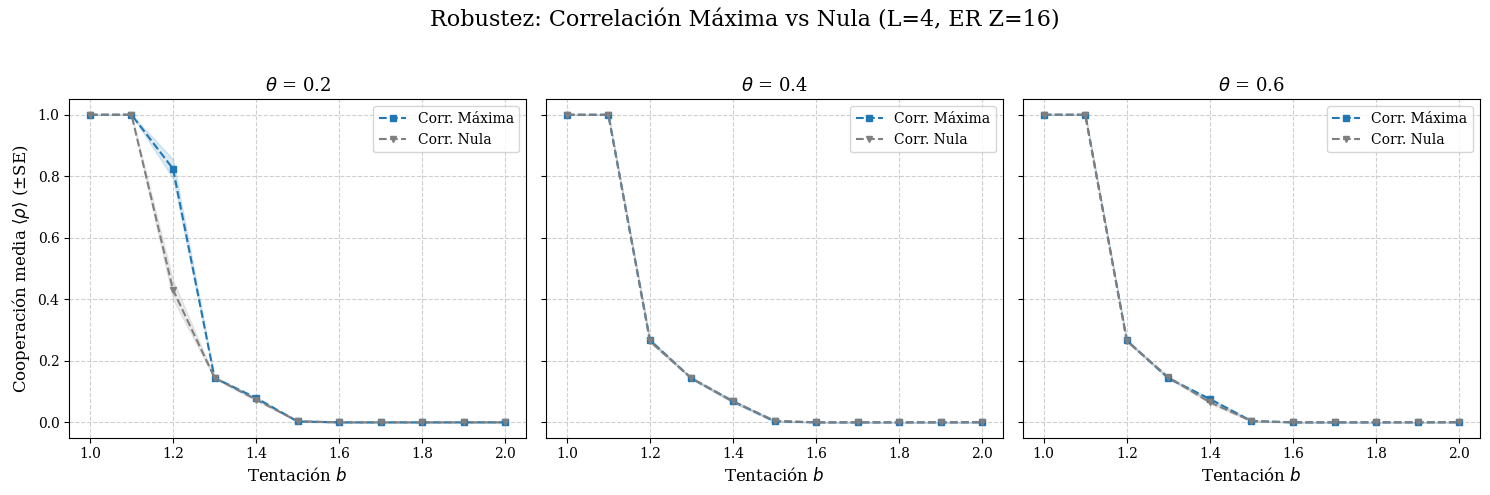

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# ==========================================
# CONFIGURACIÓN DE ARCHIVOS Y ESTILO
# ==========================================

files = {
    "BA Z=4": "/kaggle/input/phase1/DATA_BA_Z4.csv",
    "BA Z=16": "/kaggle/input/phase1/DATA_BA_Z16.csv",
    "ER Z=4": "/kaggle/input/phase1/DATA_ER_Z4.csv",
    "ER Z=16": "/kaggle/input/phase1/DATA_ER_Z16.csv"
}

plt.rcParams.update({
    "font.family": "serif",
    "axes.labelsize": 12,
    "axes.titlesize": 13,
    "legend.fontsize": 10,
    "lines.linewidth": 1.5,
    "lines.markersize": 5
})

# Número de repeticiones para calcular el Error Estándar (SE)
N_REPS = 100

# ==========================================
# 1. COMPARATIVA ALCANCE L=1 vs L=4 (CORR MAX)
# ==========================================
def plot_l_comparison_se():
    for name, filename in files.items():
        df = pd.read_csv(filename)
        thetas = [0.2,0.4,0.6]
        fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
        
        for i,theta in enumerate(thetas):
            ax = axes[i]
            for L_val, color, marker in zip([1, 4], ['#d62728', '#1f77b4'], ['o', 's']):
                mask = (df['Theta'] == theta) & (df['L'] == L_val) & (df['Corr'] == 'max')
                sub = df[mask].sort_values('b')
                if not sub.empty:
                    # Cálculo de SE
                    se = sub['V_std'] / np.sqrt(N_REPS)
                    ax.plot(sub['b'], sub['V_mean'], marker + '-', label=f'L={L_val}', color=color)
                    ax.fill_between(sub['b'], sub['V_mean'] - se, sub['V_mean'] + se, alpha=0.2, color=color)
            
            ax.set_title(f'$\\theta$ = {theta}')
            ax.set_xlabel('Tentación $b$')
            if i == 0: ax.set_ylabel('Vigilancia media $\\langle \\rho \\rangle$ ($\\pm$SE)')
            ax.grid(True, ls='--', alpha=0.6)
            ax.set_ylim(-0.05, 1.05)
            ax.legend()
        
        plt.suptitle(f'Impacto del alcance $L$ ({name}, Corr Max)', fontsize=16)
        plt.tight_layout(rect=[0, 0, 1, 0.95])
        plt.savefig(f"plot_L_SE_{name.replace('=', '').replace(' ', '_')}.png", dpi=300)
        print(f"Guardado: plot_L_SE_{name}.png")

# ==========================================
# 2. SENSIBILIDAD AL UMBRAL THETA (L=4, CORR MAX)
# ==========================================
def plot_theta_sensitivity_se():
    fig, axes = plt.subplots(2, 2, figsize=(12, 10), sharex=True, sharey=True)
    axes = axes.flatten()
    colors = ['#2ca02c', '#ff7f0e', '#9467bd']
    
    for i, (name, filename) in enumerate(files.items()):
        ax = axes[i]
        df = pd.read_csv(filename)
        thetas = sorted(df['Theta'].unique())
        for j, theta in enumerate(thetas):
            mask = (df['Theta'] == theta) & (df['L'] == 4) & (df['Corr'] == 'max')
            sub = df[mask].sort_values('b')
            if not sub.empty:
                se = sub['C_std'] / np.sqrt(N_REPS)
                ax.plot(sub['b'], sub['C_mean'], 'o-', label=f'$\\theta$ = {theta}', color=colors[j])
                ax.fill_between(sub['b'], sub['C_mean'] - se, sub['C_mean'] + se, alpha=0.2, color=colors[j])
        
        ax.set_title(f'Configuración: {name}')
        ax.grid(True, ls='--', alpha=0.6)
        if i >= 2: ax.set_xlabel('Tentación $b$')
        if i % 2 == 0: ax.set_ylabel('Cooperación media $\\langle \\rho \\rangle$ ($\\pm$SE)')
        ax.legend()

    plt.suptitle('Sensibilidad al umbral $\\theta$ (Alcance $L=4$, Corr Max)', fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.savefig("plot_Theta_SE_L4.png", dpi=300)
    print("Guardado: plot_Theta_SE_L4.png")

# ==========================================
# 3. COMPARATIVA CORRELACIÓN MÁXIMA VS NULA (L=4)
# ==========================================
def plot_correlation_comparison_se():
    for name, filename in files.items():
        df = pd.read_csv(filename)
        thetas = sorted(df['Theta'].unique())
        fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
        
        for i, theta in enumerate(thetas):
            ax = axes[i]
            # Comparando Correlación Máxima y Nula para L=4
            for c_val, label, color, marker in zip(['max', 'nulle'], ['Máxima', 'Nula'], ['#1f77b4', '#7f7f7f'], ['s', 'v']):
                mask = (df['Theta'] == theta) & (df['L'] == 4) & (df['Corr'] == c_val)
                sub = df[mask].sort_values('b')
                if not sub.empty:
                    se = sub['C_std'] / np.sqrt(N_REPS)
                    ax.plot(sub['b'], sub['C_mean'], marker + '--', label=f'Corr. {label}', color=color)
                    ax.fill_between(sub['b'], sub['C_mean'] - se, sub['C_mean'] + se, alpha=0.15, color=color)
            
            ax.set_title(f'$\\theta$ = {theta}')
            ax.set_xlabel('Tentación $b$')
            if i == 0: ax.set_ylabel('Cooperación media $\\langle \\rho \\rangle$ ($\\pm$SE)')
            ax.grid(True, ls='--', alpha=0.6)
            ax.set_ylim(-0.05, 1.05)
            ax.legend()
        
        plt.suptitle(f'Robustez: Correlación Máxima vs Nula (L=4, {name})', fontsize=16)
        plt.tight_layout(rect=[0, 0, 1, 0.95])
        plt.savefig(f"plot_Corr_SE_{name.replace('=', '').replace(' ', '_')}.png", dpi=300)
        print(f"Guardado: plot_Corr_SE_{name}.png")

# EJECUCIÓN
if __name__ == "__main__":
    plot_l_comparison_se()
    plot_theta_sensitivity_se()
    plot_correlation_comparison_se()